In [2]:
import numpy as np
import matplotlib.pyplot as plt
import autokeras as ak
import tensorflow as tf
import os

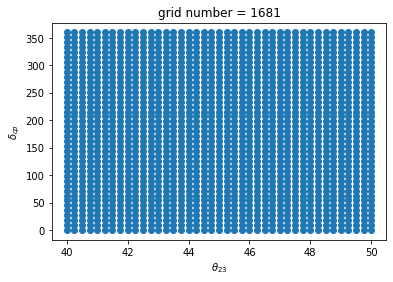

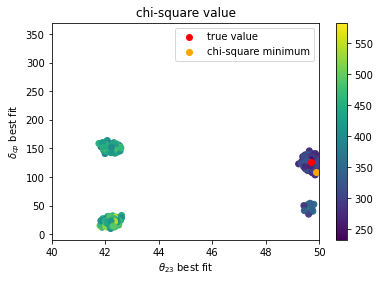

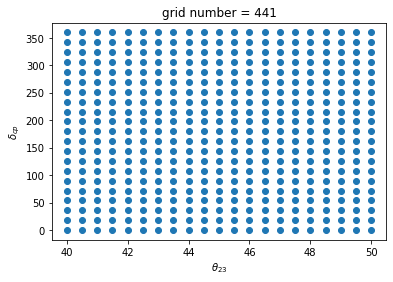

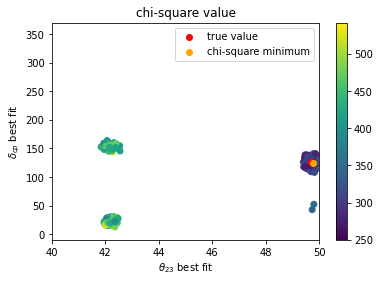

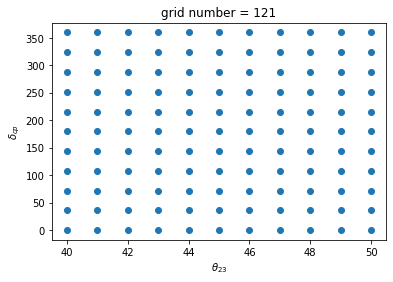

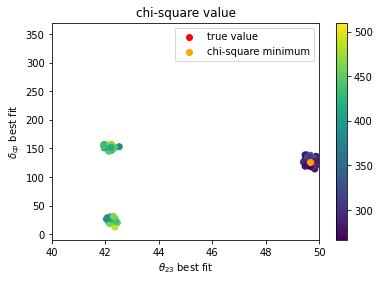

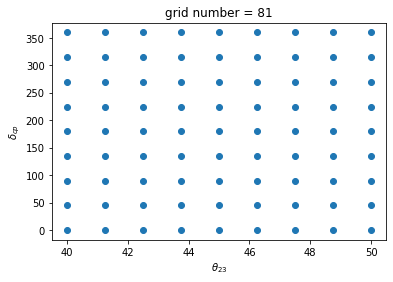

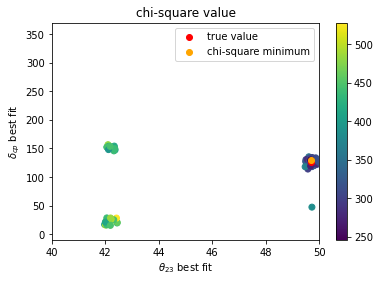

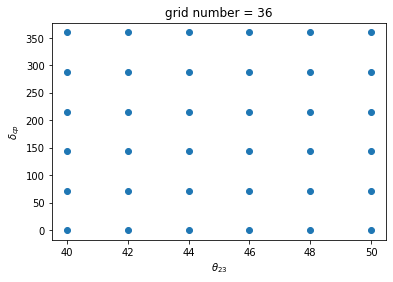

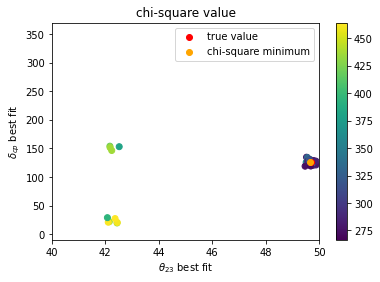

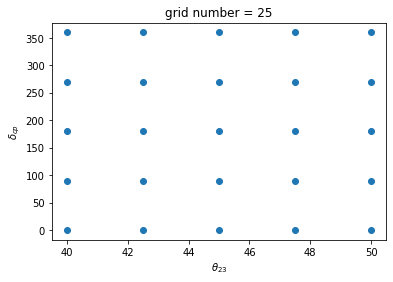

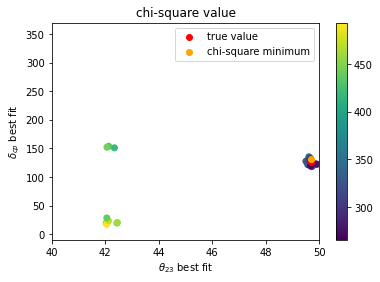

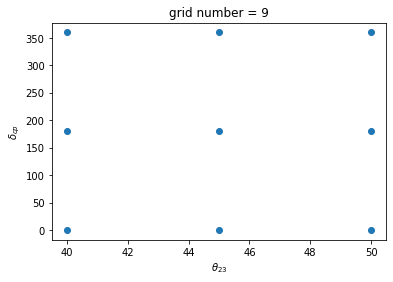

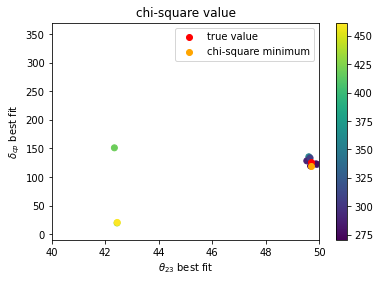

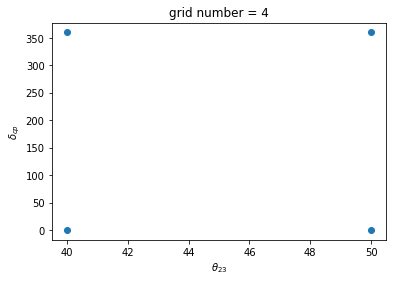

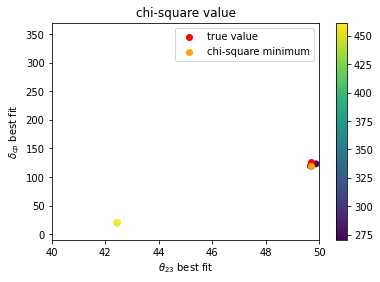

In [7]:
from collections import defaultdict
chi2_d = defaultdict(list)
mse_theta23_d = defaultdict(list)
mse_delta_d = defaultdict(list)
for i in range(1, 1001):
    data = np.load("./sample_grid/best_fit_spectrum_deltacp_theta23_grid_mse_ver{}.npz".format(i))
    chi2 = np.reshape(data['chi2'], (41,41))
    mse_theta23 = np.reshape((data['theta23_true']-data['theta23_fit'])**2*(180/np.pi)**2, (41,41))
    mse_delta = np.reshape(np.minimum((data['delta_true']-data['delta_fit'])**2, (data['delta_true']-data['delta_fit']-360)**2, (data['delta_true']-data['delta_fit']+360)**2), (41,41))
    for j in [1, 2, 4, 5, 8, 10, 20, 40]:
        p = (chi2[::j, ::j].shape)
        point = p[0]*p[1]
        chi2min = np.min(chi2[::j, ::j])
        chi2_d[point].append(chi2min)
        loc = np.where(chi2 == chi2min)
        mse_theta23_d[point].append(mse_theta23[loc][0])
        mse_delta_d[point].append(mse_delta[loc][0])
        if i == 5:
            plt.scatter(np.reshape(data['theta23_initial'], (41,41))[::j, ::j],
                        np.reshape(data['delta_initial'], (41,41))[::j, ::j])
            plt.title('grid number = {}'.format(point))
            plt.xlabel('$\\theta_{23}$')
            plt.ylabel('$\delta_{cp}$')
            plt.show()
            plt.scatter(np.reshape(data['theta23_fit'], (41,41))[::j, ::j]*180/np.pi, np.reshape(data['delta_fit'], (41,41))[::j, ::j], c = chi2[::j, ::j])
            plt.colorbar()
            plt.scatter(data['theta23_true'][0]*180/np.pi, data['delta_true'][0], c='r', label = 'true value')
            plt.scatter(np.reshape(data['theta23_fit'], (41,41))[loc]*180/np.pi, np.reshape(data['delta_fit'], (41,41))[loc], c='orange', label = 'chi-square minimum')
            plt.xlim(40, 50)
            plt.ylim(-10, 370)
#             plt.xlim(42.5, 44)
#             plt.ylim(140, 180)
            plt.legend()
            plt.title('chi-square value')
            plt.xlabel('$\\theta_{23}$ best fit')
            plt.ylabel('$\delta_{cp}$ best fit')
            plt.show()

In [1]:
chi2_keylist = chi2_d.keys()
chi2_avg = []
for key in chi2_keylist:
    chi2_avg.append(np.average(chi2_d[key]))
plt.plot(chi2_keylist, chi2_avg, '.')
plt.xlabel('grid number')
plt.ylabel('chi2 minimum average')
plt.show()

NameError: name 'chi2_d' is not defined

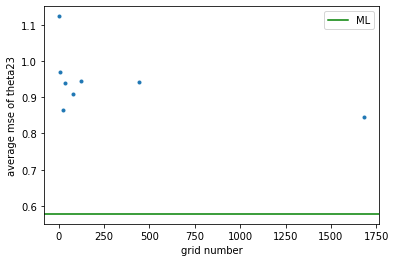

In [20]:
mse_theta23_keylist = mse_theta23_d.keys()
mse_theta23_avg = []
for key in mse_theta23_keylist:
    mse_theta23_avg.append(np.sqrt(np.average(mse_theta23_d[key])))
plt.plot(mse_theta23_keylist, mse_theta23_avg, '.')
plt.axhline(0.578, c='g', label='ML')
plt.legend()
plt.xlabel('grid number')
plt.ylabel('average mse of theta23')
plt.savefig('average mse of theta23 - grid number')
plt.show()

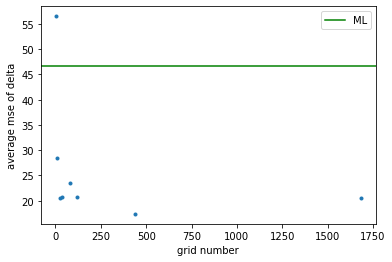

In [21]:
mse_delta_keylist = mse_delta_d.keys()
mse_delta_avg = []
for key in mse_delta_keylist:
    mse_delta_avg.append(np.sqrt(np.average(mse_delta_d[key])))
plt.plot(mse_delta_keylist, mse_delta_avg, '.')
plt.axhline(46.65, c='g', label='ML')
plt.legend()
plt.xlabel('grid number')
plt.ylabel('average mse of delta')
plt.savefig('average mse of delta - grid number')
plt.show()

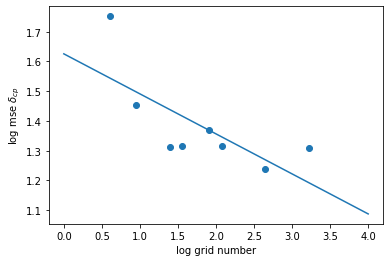

Model slope:     -0.1346083150106812
Model intercept: 1.6257526379455394


In [13]:
x_data = list(mse_delta_keylist)
y_data = mse_delta_avg

log_x_data = np.log10(x_data)
log_y_data = np.log10(y_data)
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(log_x_data[:, np.newaxis], log_y_data)

xfit = np.linspace(0, 4, 10000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(log_x_data, log_y_data)
plt.plot(xfit, yfit)
plt.xlabel('log grid number')
plt.ylabel('log mse $\delta_{cp}$')
plt.show()
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

In [14]:
for d in log_x_data:
    print(d)

3.225567713439471
2.6444385894678386
2.08278537031645
1.9084850188786497
1.5563025007672873
1.3979400086720377
0.9542425094393249
0.6020599913279624


In [15]:
for d in log_y_data:
    print(d)

1.3105309041775128
1.2400457449083628
1.3157418779270116
1.3710628008704624
1.3162374223031919
1.3129705737467232
1.4526601980574343
1.7522048785918596


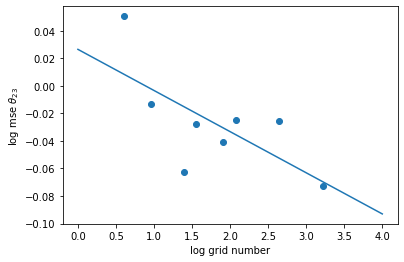

Model slope:     -0.029860749874453116
Model intercept: 0.0264649920595705


In [16]:
x_data = list(mse_theta23_keylist)
y_data = mse_theta23_avg

log_x_data = np.log10(x_data)
log_y_data = np.log10(y_data)
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(log_x_data[:, np.newaxis], log_y_data)

xfit = np.linspace(0, 4, 10000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(log_x_data, log_y_data)
plt.plot(xfit, yfit)
plt.xlabel('log grid number')
plt.ylabel('log mse $\\theta_{23}$')
plt.show()
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

In [ ]:
for d in log_y_data:
    print(d)